In [258]:
import pandas as pd
import numpy as np

In [259]:
data=pd.read_csv('/content/bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes


In [260]:
data.shape

(10861, 17)

In [261]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  int64  
 1   job        10846 non-null  object 
 2   marital    10861 non-null  object 
 3   education  10852 non-null  object 
 4   default    10861 non-null  object 
 5   balance    10855 non-null  float64
 6   housing    10861 non-null  object 
 7   loan       10858 non-null  object 
 8   contact    10850 non-null  object 
 9   day        10860 non-null  float64
 10  month      10861 non-null  object 
 11  duration   10841 non-null  float64
 12  campaign   10861 non-null  int64  
 13  pdays      10842 non-null  float64
 14  previous   10861 non-null  int64  
 15  poutcome   10861 non-null  object 
 16  y          10861 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.4+ MB


In [262]:
data.isnull().sum()

,0
age,0
job,15
marital,0
education,9
default,0
balance,6
housing,0
loan,3
contact,11
day,1


In [263]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10855.000000,10860.000000,10841.000000,10861.000000,10842.000000,10861.000000
mean,40.323727,1457.746476,17.887937,386.267687,2.442593,33.002859,0.569929
std,11.969443,3077.475009,7.846315,345.403995,2.662568,90.004568,1.875257
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,156.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1633.000000,26.000000,507.000000,3.000000,-1.000000,0.000000
max,334.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [264]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [265]:
#filling the missing values
data['job']=data['job'].fillna(data['job'].mode()[0])
data['loan']=data['loan'].fillna(data['loan'].mode()[0])
data['education']=data['education'].fillna(data['education'].mode()[0])
data['contact']=data['contact'].fillna(data['contact'].mode()[0])





In [266]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,6
housing,0
loan,0
contact,0
day,1


In [267]:
data['balance']=data['balance'].fillna(data['balance'].median())
data['duration']=data['duration'].fillna(data['duration'].median())
data['day']=data['day'].fillna(data['day'].median())

data['pdays']=data['pdays'].fillna(data['pdays'].median())




In [268]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [269]:
data['loan'].value_counts()

,count
loan,
no,9508
yes,1353


In [270]:
data['y'].value_counts()


,count
y,
no,5572
yes,5289


In [271]:
data['housing'].value_counts()

,count
housing,
yes,6954
no,3907


In [272]:
data['job'].value_counts()

,count
job,
blue-collar,2569
management,2134
technician,1718
admin.,1317
services,997
retired,664
student,326
self-employed,320
unemployed,314


In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

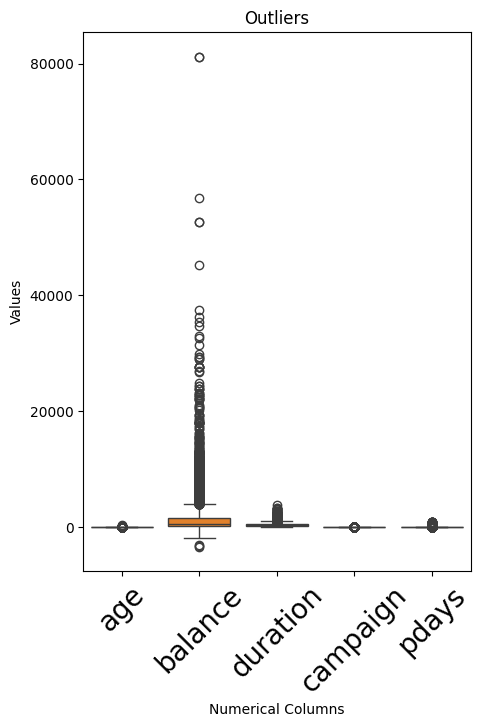

In [221]:
# treating outliers with boxplot
numerical_features=['age','balance','duration','campaign','pdays']
plt.figure(figsize=(5,7))
sns.boxplot(data=data[numerical_features])
plt.title('Outliers')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45,fontsize=20)
plt.show()





In [222]:
# treating outliers
outlier_columns=['age','balance','duration','campaign','pdays']

Q1=data[outlier_columns].quantile(0.25)
Q3=data[outlier_columns].quantile(0.75)
IQR=Q3-Q1

outlier_lower=data[outlier_columns]<(Q1-1.5*IQR)
outlier_upper=data[outlier_columns]>(Q3+1.5*IQR)

data[outlier_columns]=data[outlier_columns].clip(lower=Q1-1.5*IQR,upper=Q3+1.5*IQR,axis=1)



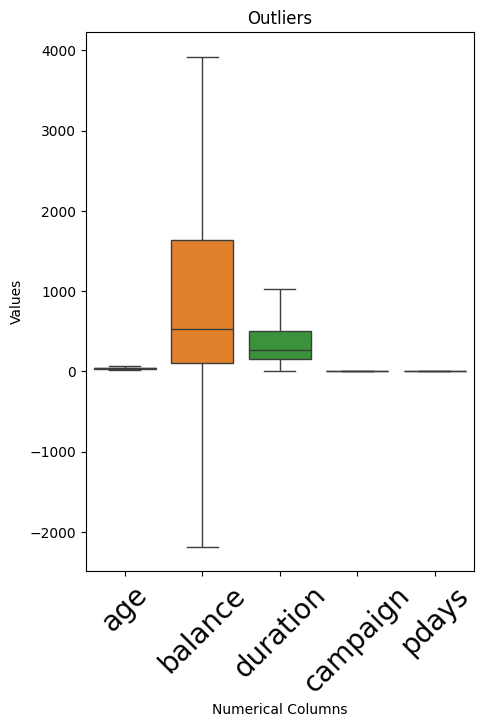

In [223]:
numerical_features=['age','balance','duration','campaign','pdays']
plt.figure(figsize=(5,7))
sns.boxplot(data=data[numerical_features])
plt.title('Outliers')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45,fontsize=20)
plt.show()

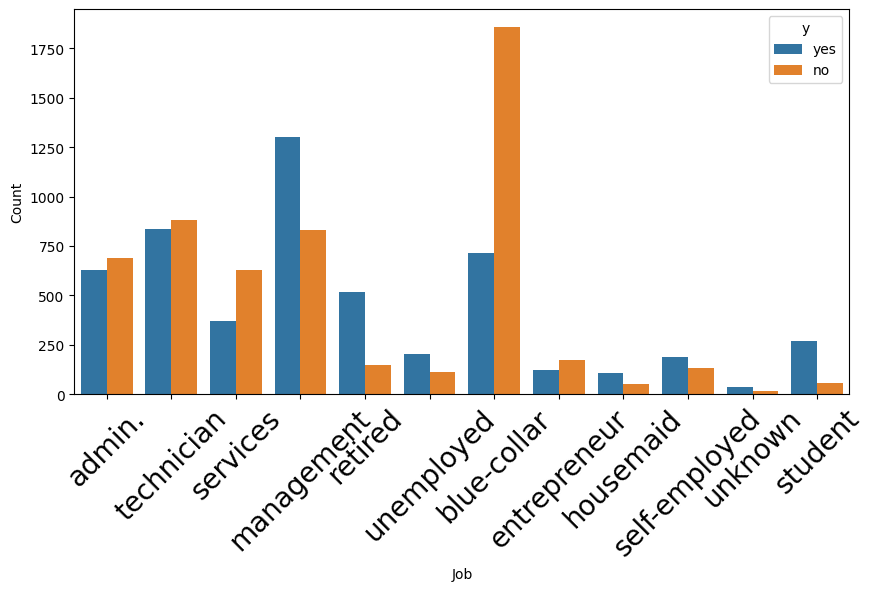

In [224]:
#visualisation
plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='y',data=data)

plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45,fontsize=20)
plt.show()

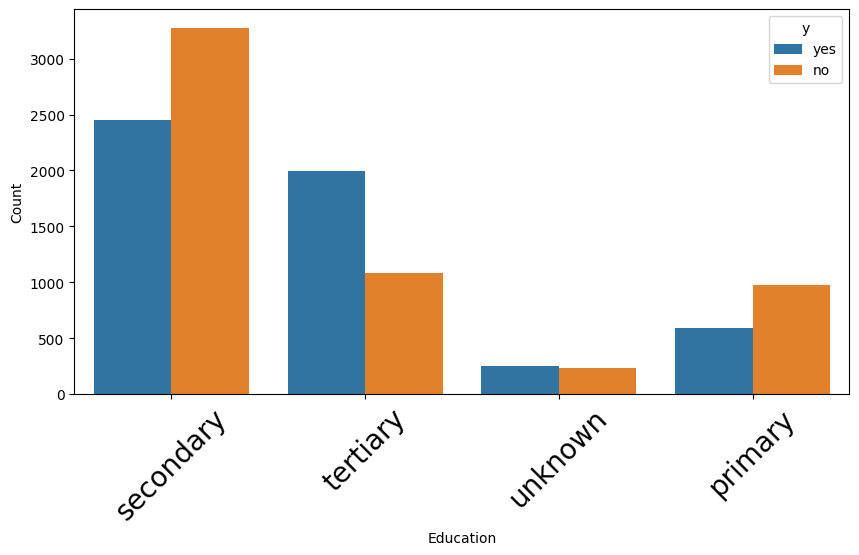

In [225]:
plt.figure(figsize=(10,5))
sns.countplot(x='education',hue='y',data=data)

plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45,fontsize=20)
plt.show()

In [228]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1032.0,1,-1.0,0,unknown,yes
1,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1032.0,1,-1.0,0,unknown,yes
2,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1032.0,1,-1.0,0,unknown,yes
3,55.0,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes


In [229]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
caterigorical_columns=['job','housing','loan','marital','education','default','y','default','contact','month','poutcome']
for column in caterigorical_columns:
  data[column]=label_encoder.fit_transform(data[column])



In [231]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59.0,0,1,1,0,2343.0,1,0,2,5.0,8,1032.0,1,-1.0,0,3,1
1,56.0,0,1,1,0,45.0,0,0,2,5.0,8,1032.0,1,-1.0,0,3,1
2,41.0,9,1,1,0,1270.0,1,0,2,5.0,8,1032.0,1,-1.0,0,3,1
3,55.0,7,1,1,0,2476.0,1,0,2,5.0,8,579.0,1,-1.0,0,3,1
4,54.0,0,1,2,0,184.0,0,0,2,5.0,8,673.0,2,-1.0,0,3,1


In [232]:
x=data.drop(['y'],axis=1)
y=data['y']

In [233]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)




In [234]:
x_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
393,39.0,1,1,0,0,2303.0,1,0,2,17.0,6,775.0,3,-1.0,0,3
10052,29.0,9,2,1,1,-397.0,1,0,2,28.0,8,114.0,1,-1.0,0,3
6208,39.0,9,1,1,1,-183.0,1,0,2,14.0,8,202.0,2,-1.0,0,3
8575,34.0,1,1,0,0,2490.0,1,0,2,23.0,8,192.0,1,-1.0,0,3
8426,31.0,1,1,1,0,1599.0,1,0,2,21.0,8,49.0,1,-1.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,39.0,1,1,1,0,661.0,1,0,2,12.0,8,162.0,4,-1.0,0,3
5191,26.0,1,2,1,0,2007.0,0,0,0,13.0,10,194.0,1,-1.0,5,2
5390,32.0,0,0,1,0,43.0,1,0,2,9.0,8,218.0,2,-1.0,0,3
860,59.0,5,1,0,0,3400.0,1,0,0,5.0,1,515.0,3,-1.0,0,3


In [235]:
y_train

,y
393,1
10052,0
6208,0
8575,0
8426,0
...,...
5734,0
5191,1
5390,0
860,1


In [236]:
x_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
33,37.0,10,2,1,0,381.0,1,0,2,8.0,8,985.0,2,-1.0,0,3
7235,45.0,1,2,1,0,636.0,1,0,2,16.0,8,287.0,4,-1.0,0,3
8682,26.0,8,2,2,0,1570.0,1,0,2,23.0,8,81.0,1,-1.0,0,3
5982,46.0,1,0,0,0,274.0,1,0,2,13.0,8,20.0,1,-1.0,0,3
7066,40.0,0,1,1,0,2523.0,1,0,2,16.0,8,75.0,1,-1.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,69.5,5,0,1,0,3922.0,0,0,0,19.0,10,343.0,3,-1.0,0,3
8516,36.0,1,1,0,0,-402.0,0,0,2,21.0,8,173.0,6,-1.0,0,3
603,36.0,1,1,1,0,324.0,1,1,0,16.0,5,830.0,1,-1.0,0,3
2826,48.0,4,1,2,0,3842.0,0,0,0,1.0,6,215.0,2,-1.0,0,3


In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [243]:
ln_model=LogisticRegression()
ln_model.fit(x_train,y_train)
y_pred=ln_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:',accuracy*100)
print('Classification Report:\n',classification_report(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))


Accuracy: 95.58214450069029
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1119
           1       0.97      0.94      0.95      1054

    accuracy                           0.96      2173
   macro avg       0.96      0.96      0.96      2173
weighted avg       0.96      0.96      0.96      2173

Confusion Matrix:
 [[1084   35]
 [  61  993]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [242]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:',accuracy*100)
print('Classification Report:\n',classification_report(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))


Accuracy: 97.79107225034515
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1119
           1       0.97      0.99      0.98      1054

    accuracy                           0.98      2173
   macro avg       0.98      0.98      0.98      2173
weighted avg       0.98      0.98      0.98      2173

Confusion Matrix:
 [[1085   34]
 [  14 1040]]


In [241]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
#accuracy score in percentage
print(f'Accuracy:',accuracy*100)
print('Classification Report:\n',classification_report(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))



Accuracy: 98.38932351587667
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1119
           1       0.99      0.98      0.98      1054

    accuracy                           0.98      2173
   macro avg       0.98      0.98      0.98      2173
weighted avg       0.98      0.98      0.98      2173

Confusion Matrix:
 [[1110    9]
 [  26 1028]]


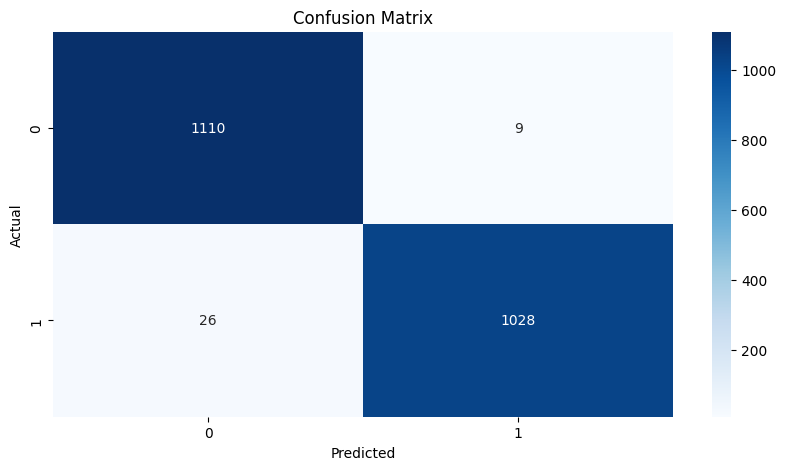

In [247]:
#visualization of confusion matrix
plt.figure(figsize=(10,5))
y_pred=rf_model.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [250]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Best parameters
print(grid_search.best_params_)

# Train and evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)

print(accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
0.9838932351587667
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1119
           1       0.99      0.98      0.98      1054

    accuracy                           0.98      2173
   macro avg       0.98      0.98      0.98      2173
weighted avg       0.98      0.98      0.98      2173



In [252]:
y_pred_best=best_model.predict(x_test)
print(y_test)

33      1
7235    0
8682    0
5982    0
7066    0
       ..
3574    1
8516    0
603     1
2826    1
2453    1
Name: y, Length: 2173, dtype: int64


In [280]:
from sklearn.preprocessing import StandardScaler
new_data = pd.DataFrame({
    'age':[45],
    'job':['management'],
    'marital':['single'],
    'education':['tertiary'],
    'default':['no'],
    'balance':[1780],
    'housing':['yes'],
    'loan':['no'],
    'contact':['cellular'],
    'day':[5],
    'month':['may'],
    'duration':[371],
    'campaign':[1],
    'pdays':[-1],
    'previous':[0],
    'poutcome':['unknown']
})
numerical_cols=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
caterigorical_cols=['job','housing','loan','marital','education','default','contact','month','poutcome']
for col in caterigorical_cols:
    le=LabelEncoder()
    new_data[col]=le.fit_transform(new_data[col])

scaler=StandardScaler()
scaler.fit(new_data)
new_data_scaled = scaler.transform(new_data)
predictions=best_model.predict(new_data_scaled)
if predictions[0]==0:
  print('No')
else:
  print('Yes')

print(predictions)


Yes
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
